In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IsingSolutions import ising2d_exact, ising3d_monte_carlo as ising3d_mc
from TNModels import AKLT3D
from scipy.interpolate import interp1d,PchipInterpolator
from glob import glob
import numpy as np
import os
from tqdm.auto import tqdm
import json

In [2]:
task_name='AKLT3D_X10_scan_grid_critical_a3.old'
critical_params={'a1':np.sqrt(20/15),'a2':np.sqrt(20/6),'a3':np.sqrt(20/1)}

In [3]:
def load_df(filenames):
    filenames=sorted(filenames,key=lambda x:os.path.getmtime(x))
    df=[]
    for filename in tqdm(filenames):
        data=json.load(open(filename,'r'))
        df.append(data['params'])
    print('loaded {} files'.format(len(df)))
    df=pd.DataFrame(df)
    return df
def fix_grid(df):
    df1=[]
    for a1 in df.a1.unique():
        for a2 in df.a2.unique():
            # find one or None
            df2=df[(df.a1==a1)&(df.a2==a2)]
            if len(df2)==0:
                df1.append({'a1':a1,'a2':a2,'a3':np.nan})
            else:
                df1.append({'a1':a1,'a2':a2,'a3':df2.a3.values[0]})
    df1=pd.DataFrame(df1)
    return df1
df=load_df(glob('./data/{task_name}/*/Tc.json'.format(task_name=task_name)))
df=fix_grid(df)
os.makedirs('./data_output/{task_name}/'.format(task_name=task_name),exist_ok=True)
df.to_csv('./data_output/{task_name}/Tc.csv'.format(task_name=task_name),index=False)
print('file saved to ./data_output/{task_name}/Tc.csv'.format(task_name=task_name))

  0%|          | 0/110 [00:00<?, ?it/s]

loaded 110 files
file saved to ./data_output/AKLT3D_X10_scan_grid_critical_a3/Tc.csv


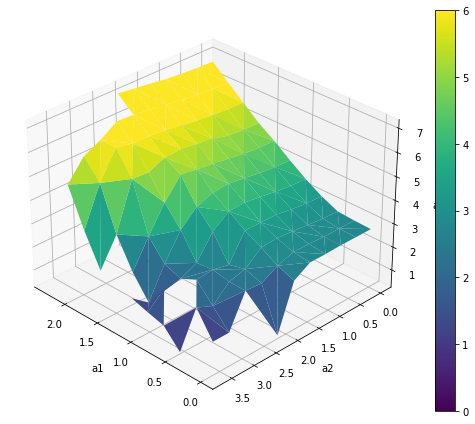

saved to ./data_output/AKLT3D_X10_scan_grid_critical_a3/surface_plot.png
wrong, need fixing


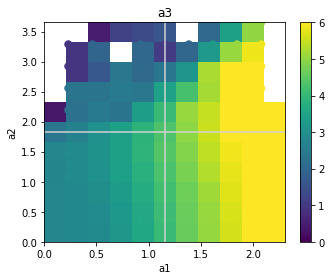

saved to ./data_output/AKLT3D_X10_scan_grid_critical_a3/image_plot.png


In [4]:
# %matplotlib widget
%matplotlib inline

def surface_plot_section(df,clim=None,filename=None):
    obs_name='a3'
    other_param_names=['a1','a2']
    fig = plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111,projection='3d')
    df=df.sort_values(by=other_param_names)
    p=ax.plot_trisurf(df[other_param_names[0]],df[other_param_names[1]],df[obs_name],cmap='viridis',vmin=clim and clim[0],vmax=clim and clim[1])
    # p=ax.scatter(df[other_param_names[0]],df[other_param_names[1]],df[obs_name],c=df[obs_name],cmap='viridis',s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    ax.set_xlabel(other_param_names[0]);ax.set_ylabel(other_param_names[1]);ax.set_zlabel(obs_name)
    # rotate camera 
    ax.view_init(30, 135)
    fig.colorbar(p)
    plt.tight_layout()
    plt.show()
    if filename:
        fig.savefig(filename,bbox_inches='tight');print(f'saved to {filename}')
def image_plot_2D(df,clim=None,filename=None):
    print("wrong, need fixing")
    fig=plt.figure(figsize=(5,4))
    plt.axhline(critical_params['a2'],c='lightgrey')
    plt.axvline(critical_params['a1'],c='lightgrey')
    df=df.sort_values(by=['a1','a2'])
    a1s=np.unique(df['a1'])
    a2s=np.unique(df['a2'])
    obs=df['a3'].values.reshape(len(a2s),len(a1s)).T
    plt.imshow(obs,origin='lower',extent=[a1s[0],a1s[-1],a2s[0],a2s[-1]],aspect='auto',cmap='viridis',vmin=clim and clim[0],vmax=clim and clim[1])
    plt.scatter(df['a1'],df['a2'],c=df['a3'],s=50,vmin=clim and clim[0],vmax=clim and clim[1])
    plt.xlabel('a1');plt.ylabel('a2');plt.title('a3')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    if filename:
        fig.savefig(filename,bbox_inches='tight');print(f'saved to {filename}')


surface_plot_section(df,clim=[0,6],filename='./data_output/{}/surface_plot.png'.format(task_name))
image_plot_2D(df,clim=[0,6],filename='./data_output/{}/image_plot.png'.format(task_name))
